# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Loading Data Set

In [2]:
df = pd.read_csv("hotel_booking.csv")

# Exploratory Data Analysis and Data Cleaning 

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df.shape

(119390, 36)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

In [7]:
df.describe(include = "object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [8]:
for col in df.describe(include = "object").columns:
    print(col)
    print(df[col].unique())
    print("-"*100)

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK

In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
df.drop(['company', 'agent'], axis=1, inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


<Axes: >

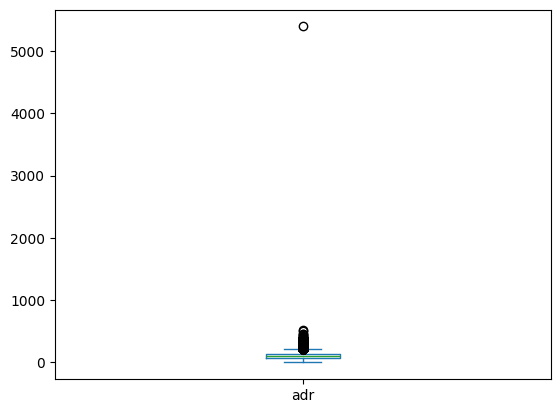

In [14]:
df["adr"].plot(kind = "box")
# we need to remove outliers

In [15]:
df=df[df["adr"]<5000]

In [16]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [17]:
cncl_percent = df["is_canceled"].value_counts(normalize=True)*100

In [18]:
cncl_percent

is_canceled
0    62.865337
1    37.134663
Name: proportion, dtype: float64

<BarContainer object of 2 artists>

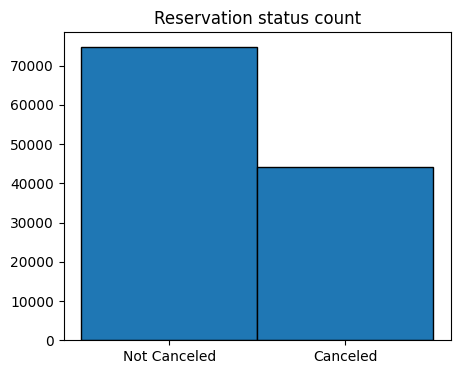

In [40]:
plt.figure(figsize=(5,4))
plt.title("Reservation status count")
plt.bar(["Not Canceled", "Canceled"], df['is_canceled'].value_counts(), edgecolor = "k", width=1)

Text(0, 0.5, 'number of reservation')

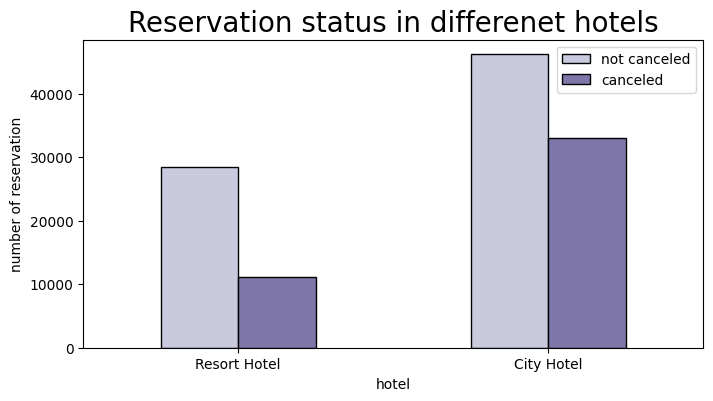

In [20]:
plt.figure(figsize = (8,4))
ax1 = sns.countplot(x="hotel", hue="is_canceled", data = df, palette = "Purples", edgecolor = "k", width=0.)
plt.title("Reservation status in differenet hotels", size= 20)
plt.legend(["not canceled", "canceled"])
plt.xlabel("hotel")
plt.ylabel("number of reservation")

In [21]:
resort_hotel = df[df["hotel"] == "Resort Hotel"]
resort_hotel['is_canceled'].value_counts(normalize = True)*100

is_canceled
0    72.024952
1    27.975048
Name: proportion, dtype: float64

In [22]:
city_hotel = df[df["hotel"] == "City Hotel"]
city_hotel['is_canceled'].value_counts(normalize = True)*100

is_canceled
0    58.291825
1    41.708175
Name: proportion, dtype: float64

In [23]:
resort_hotel = resort_hotel.groupby("reservation_status_date")[["adr"]].mean()

In [24]:
city_hotel = city_hotel.groupby("reservation_status_date")[["adr"]].mean()

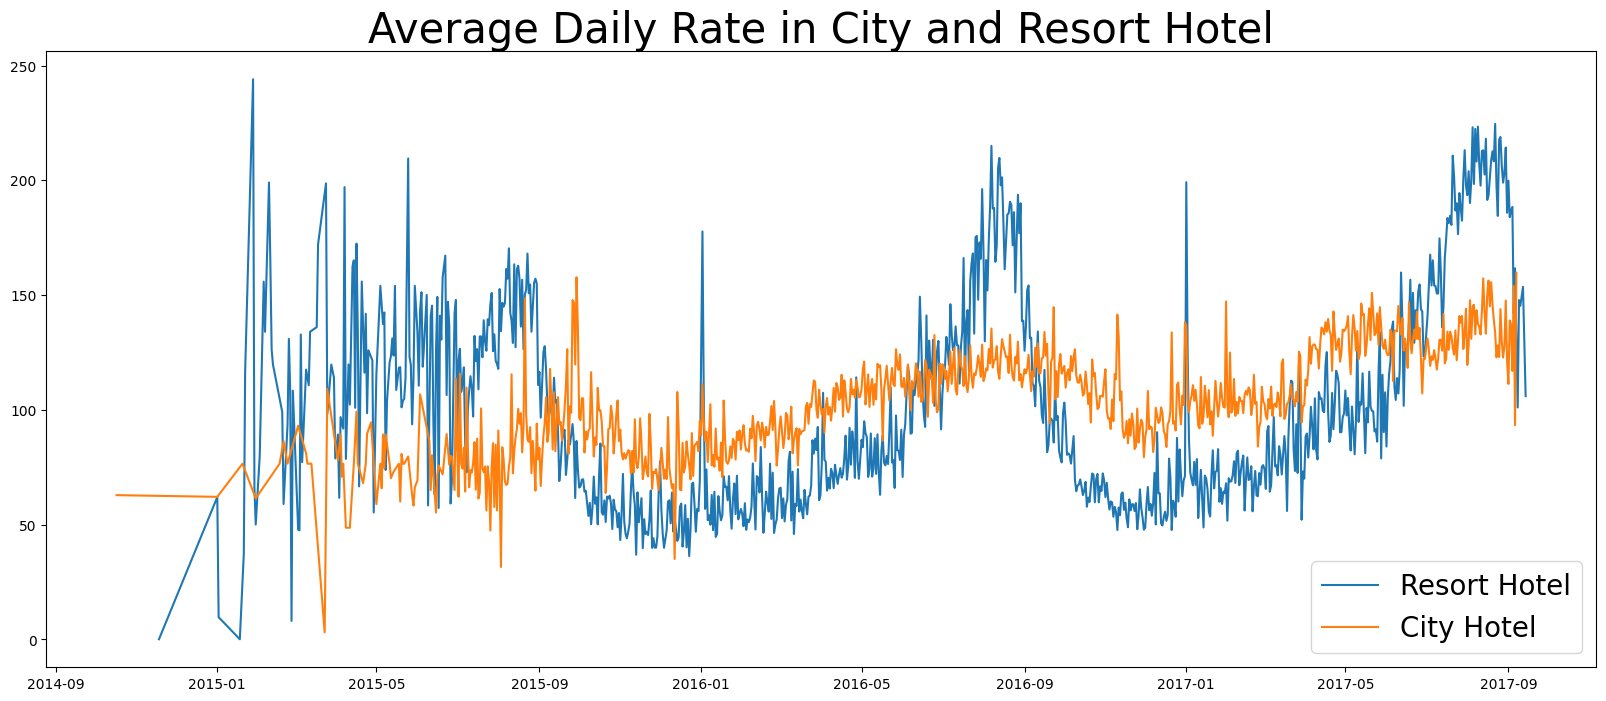

In [25]:
plt.figure(figsize=(20,8))
plt.title("Average Daily Rate in City and Resort Hotel", fontsize=30)
plt.plot(resort_hotel.index, resort_hotel["adr"], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel["adr"], label= "City Hotel")
plt.legend(fontsize=20)

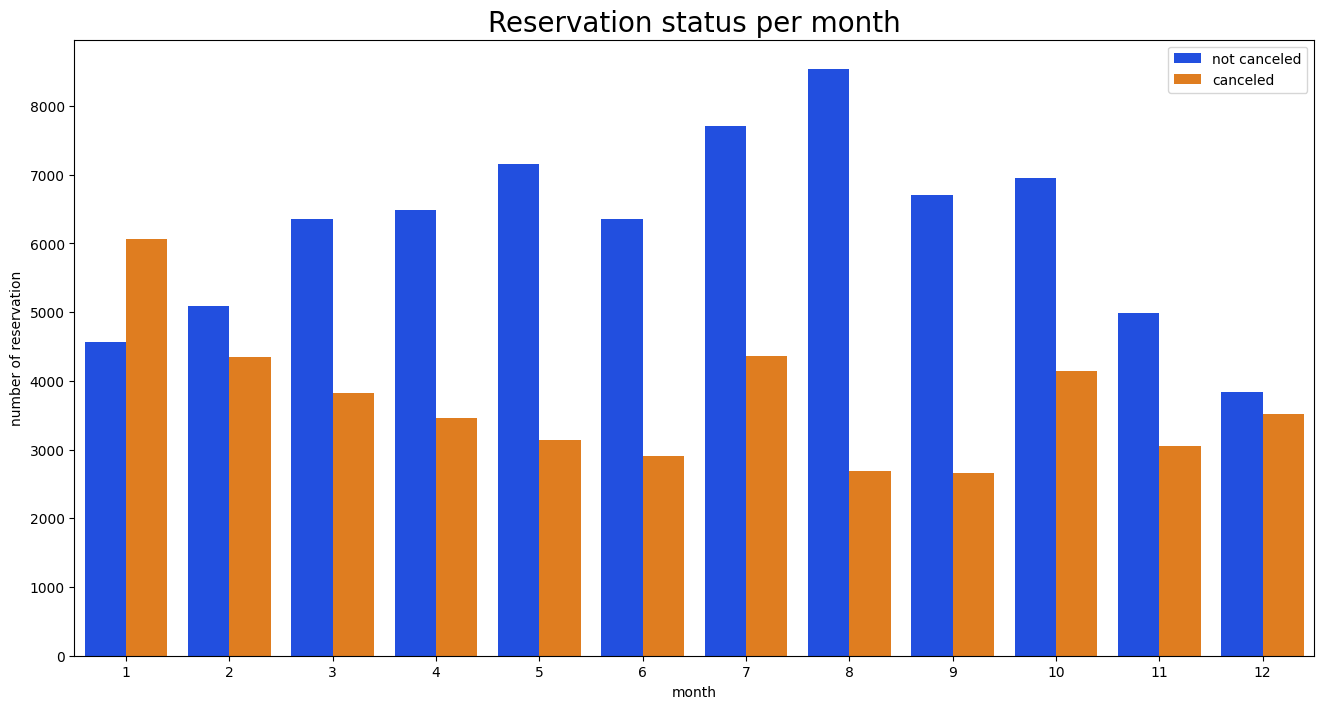

In [26]:
df["month"] = df["reservation_status_date"].dt.month
plt.figure(figsize=(16,8))
sns.countplot(x="month", hue="is_canceled", data = df, palette = "bright")
plt.title("Reservation status per month", size=20)
plt.xlabel("month")
plt.ylabel("number of reservation")
plt.legend(["not canceled", "canceled"])

Text(0.5, 1.0, 'Avg Daily Rate')

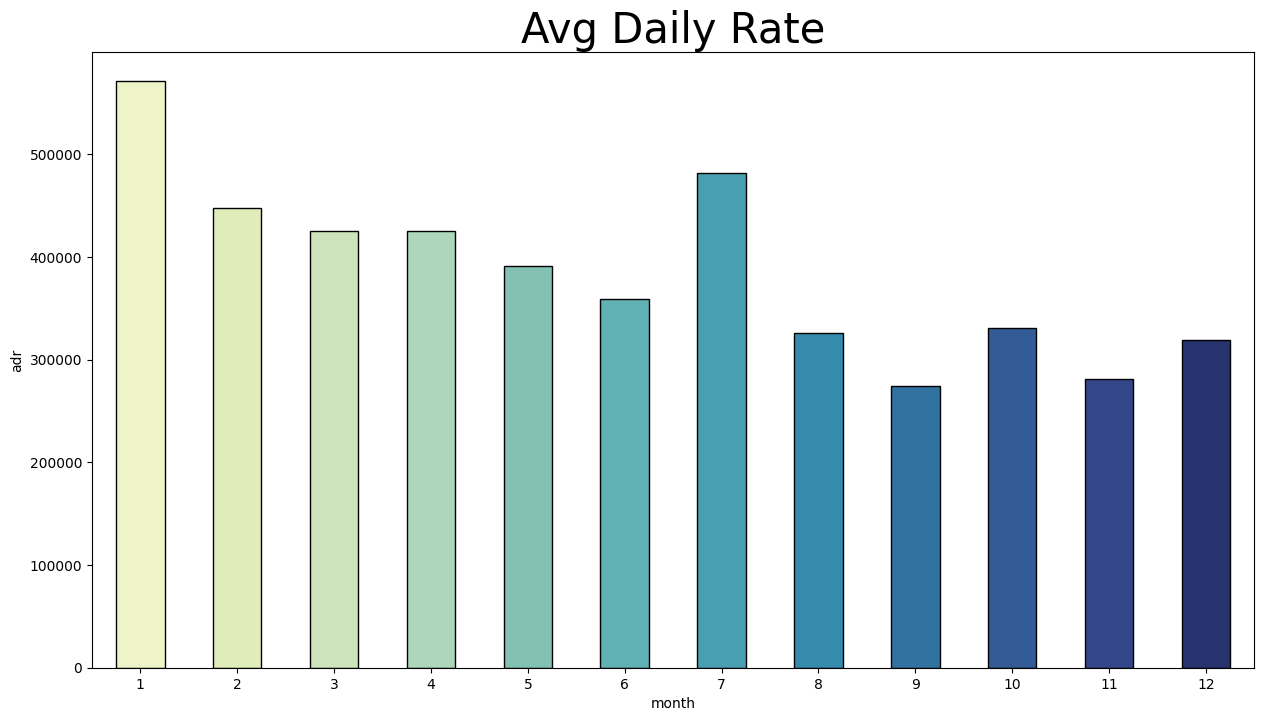

In [27]:
df1 = df[df["is_canceled"]== 1].groupby("month")[["adr"]].sum().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x="month", y="adr", data = df1, palette = "YlGnBu", edgecolor = "k", width=0.5 )
plt.title("Avg Daily Rate", fontsize=30)

In [28]:
cncl_data = df[df["is_canceled"]==1]
non_cncl_data = df[df["is_canceled"]==0]

([<matplotlib.patches.Wedge at 0x1db03bcdc50>,
 [Text(-0.8408967968128621, 0.7091491924199507, 'PRT'),
  Text(0.4153665646745388, -1.0185630156993097, 'GBR'),
  Text(0.7875372153829483, -0.7679746964496107, 'ESP'),
  Text(1.0096628979239712, -0.4365556465741436, 'FRA'),
  Text(1.092316810765553, -0.12978437856295064, 'ITA')],
 [Text(-0.45867098007974294, 0.38680865041088214, '77.70'),
  Text(0.2265635807315666, -0.555579826745078, '6.93'),
  Text(0.4295657538452445, -0.4188952889725149, '6.15'),
  Text(0.5507252170494388, -0.23812126176771464, '5.46'),
  Text(0.5958091695084834, -0.07079147921615489, '3.76')])

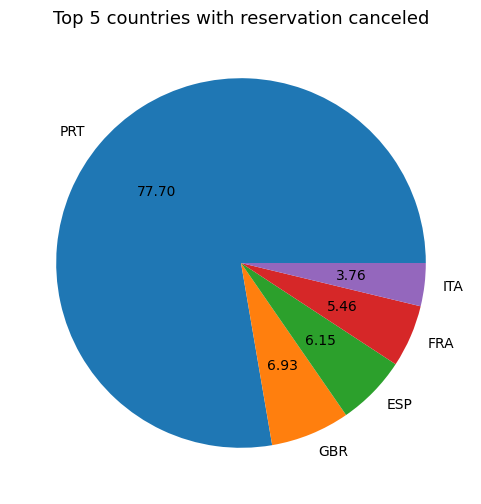

In [29]:
top_5_country = cncl_data["country"].value_counts()[:5]
plt.figure(figsize=(6,6))
plt.title("Top 5 countries with reservation canceled", fontsize=13)
plt.pie(top_5_country, autopct="%.2f", labels= top_5_country.index)

In [30]:
df["market_segment"].value_counts(normalize=True)*100

market_segment
Online TA        47.437698
Offline TA/TO    20.319268
Groups           16.658116
Direct           10.469566
Corporate         4.298679
Complementary     0.617341
Aviation          0.199332
Name: proportion, dtype: float64

In [32]:
cncl_data["market_segment"].value_counts(normalize=True)*100

market_segment
Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: proportion, dtype: float64

In [33]:
cncl_df_adr = cncl_data.groupby("reservation_status_date")[["adr"]].mean()
cncl_df_adr.reset_index(inplace=True)
cncl_df_adr.sort_values("reservation_status_date", inplace=True)

In [34]:
non_cncl_df_adr = non_cncl_data.groupby('reservation_status_date')[["adr"]].mean()
non_cncl_df_adr.reset_index(inplace=True)
non_cncl_df_adr.sort_values("reservation_status_date", inplace=True)

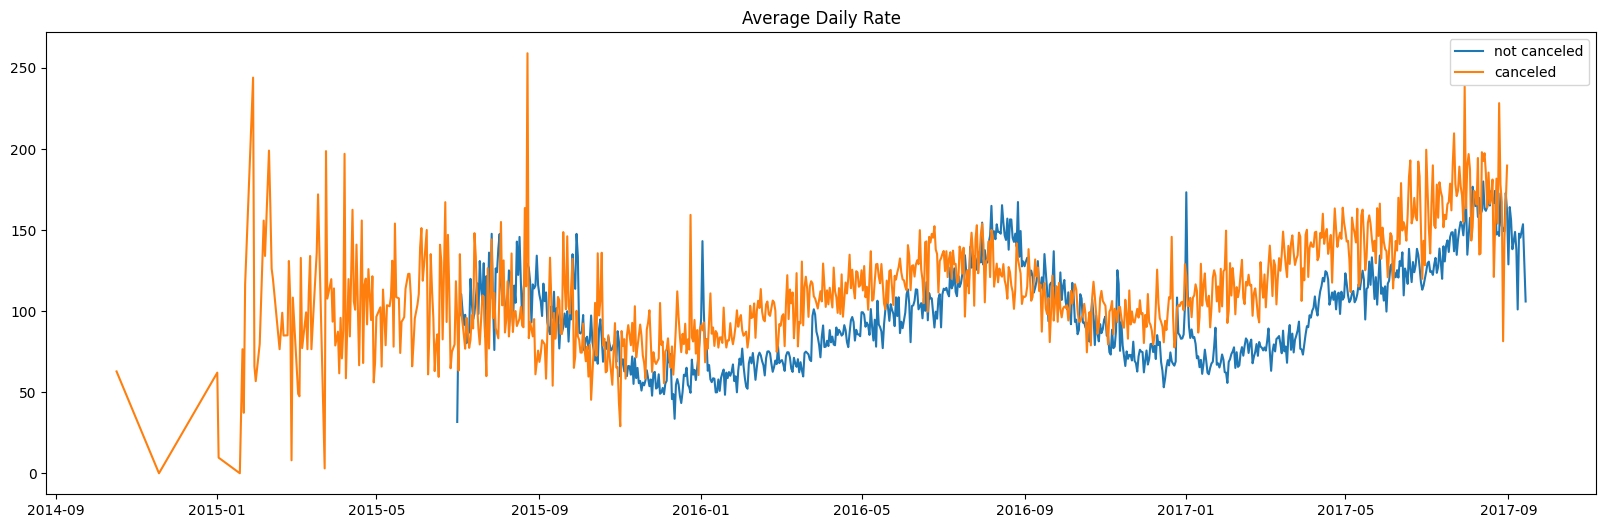

In [35]:
plt.figure(figsize=(20,6))
plt.title("Average Daily Rate")
plt.plot(non_cncl_df_adr["reservation_status_date"], non_cncl_df_adr["adr"], label="not canceled")
plt.plot(cncl_df_adr["reservation_status_date"], cncl_df_adr["adr"], label="canceled")
plt.legend()

In [36]:
cncl_df_adr = cncl_df_adr[(cncl_df_adr["reservation_status_date"]>'2016') & (cncl_df_adr["reservation_status_date"]<'2017-09')]
non_cncl_df_adr = non_cncl_df_adr[(non_cncl_df_adr["reservation_status_date"]>'2016') & (non_cncl_df_adr["reservation_status_date"]<'2017-09')]

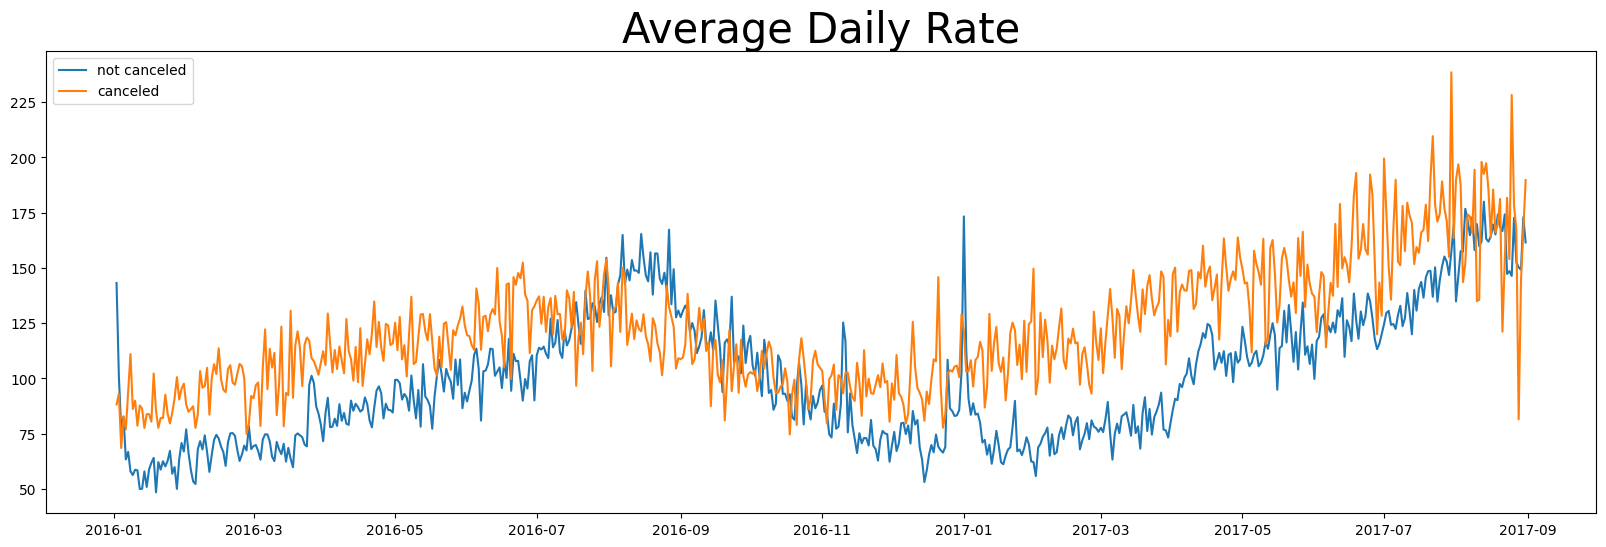

In [38]:
plt.figure(figsize=(20,6))
plt.title("Average Daily Rate",fontsize=30)
plt.plot(non_cncl_df_adr["reservation_status_date"], non_cncl_df_adr["adr"], label="not canceled")
plt.plot(cncl_df_adr["reservation_status_date"], cncl_df_adr["adr"], label="canceled")
plt.legend()